In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Fetch DataFrame from github csv
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(URL)

In [4]:
#Just a test on sum
df1 = df.loc[(df['Province/State'].notna()) & (df['Country/Region'] == 'Australia')][['Province/State','Country/Region', '2/5/21']]
#filtered result
print(df1)
#check sum
df1['2/5/21'].sum()
#df

                  Province/State Country/Region  2/5/21
8   Australian Capital Territory      Australia     118
9                New South Wales      Australia    5119
10            Northern Territory      Australia     101
11                    Queensland      Australia    1311
12               South Australia      Australia     602
13                      Tasmania      Australia     234
14                      Victoria      Australia   20456
15             Western Australia      Australia     907


28848

In [5]:
/#Format the DataFrame
countries = df['Country/Region'].unique()
days = df.columns[4:]

list = []

#Convert dates to ISO format
for country in countries:
    for day in days:
        date_obj = datetime.strptime(day, '%m/%d/%y')
        iso_date = date_obj.strftime('%Y-%m-%d')
        #Need sum because there are more states for some country
        sum = df.loc[df['Country/Region'] == country][day].sum()
        list.append({"Country" : country, "Date" : iso_date, "Confirmed" : sum})
        
print("Done")

Done


In [6]:
df_formatted = pd.DataFrame(list)
print(df_formatted)
#Control test on 2021-02-05
df_formatted.loc[(df_formatted['Country'] == 'Australia') & (df_formatted['Date'] == '2021-02-05')]

           Country        Date  Confirmed
0      Afghanistan  2020-01-22          0
1      Afghanistan  2020-01-23          0
2      Afghanistan  2020-01-24          0
3      Afghanistan  2020-01-25          0
4      Afghanistan  2020-01-26          0
...            ...         ...        ...
73339     Zimbabwe  2021-02-02      33814
73340     Zimbabwe  2021-02-03      33964
73341     Zimbabwe  2021-02-04      34171
73342     Zimbabwe  2021-02-05      34331
73343     Zimbabwe  2021-02-06      34487

[73344 rows x 3 columns]


,Country,Date,Confirmed
3436,Australia,2021-02-05,28848


In [7]:
#Format the DataFrame with new confirmed
countries = df['Country/Region'].unique()
#TODO days is ordered(?)
days = df.columns[4:]
list = []

#TODO nan value on confirmed(?)

#Convert dates to ISO format
for country in countries:
    old_confirmed = math.nan
    for day in days:
        #Convert dates to ISO format just once
        date_obj = datetime.strptime(day, '%m/%d/%y')
        iso_date = date_obj.strftime('%Y-%m-%d')
        #Need sum because there are more states for some country
        sum = df.loc[df['Country/Region'] == country][day].sum()
        newConfirmed = sum-old_confirmed
        #TODO return negative value for new confirmed or 0 
        list.append({"Country" : country, "Date" : iso_date, "Confirmed" : sum, "New Confirmed" : newConfirmed if newConfirmed>0 or math.isnan(newConfirmed) else 0 })
        #list.append({"Country" : country, "Date" : iso_date, "Confirmed" : sum, "New Confirmed" : newConfirmed})
        old_confirmed = sum
        
print("Done")

Done


In [8]:
df_formatted = pd.DataFrame(list)
df_formatted
#df_formatted.loc[df_formatted['New Confirmed'] < 0]
#Check nan values
df_formatted.loc[df_formatted['New Confirmed'].isnull()]

,Country,Date,Confirmed,New Confirmed
0,Afghanistan,2020-01-22,0,NaN
382,Albania,2020-01-22,0,NaN
764,Algeria,2020-01-22,0,NaN
1146,Andorra,2020-01-22,0,NaN
1528,Angola,2020-01-22,0,NaN
...,...,...,...,...
71434,Vietnam,2020-01-22,0,NaN
71816,West Bank and Gaza,2020-01-22,0,NaN
72198,Yemen,2020-01-22,0,NaN
72580,Zambia,2020-01-22,0,NaN


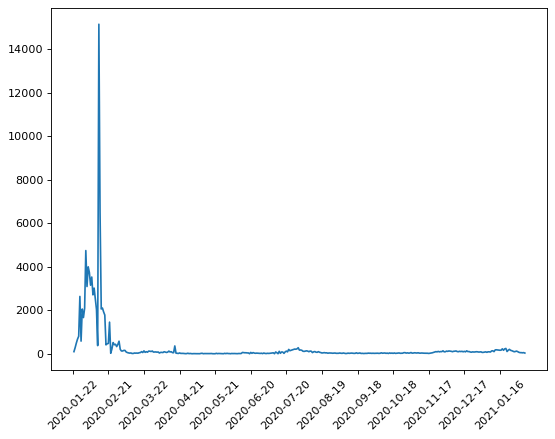

In [50]:
#Plot of one country
country = "China"

country = df_formatted.loc[df_formatted["Country"] == country]
new_confirmed = country["New Confirmed"]
dates = country["Date"]

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot = plt.plot(dates, new_confirmed)

#Edit x axis label frequency and rotation
plt.xticks(np.arange(0, len(dates)+1, 30), rotation=45)
plt.show()

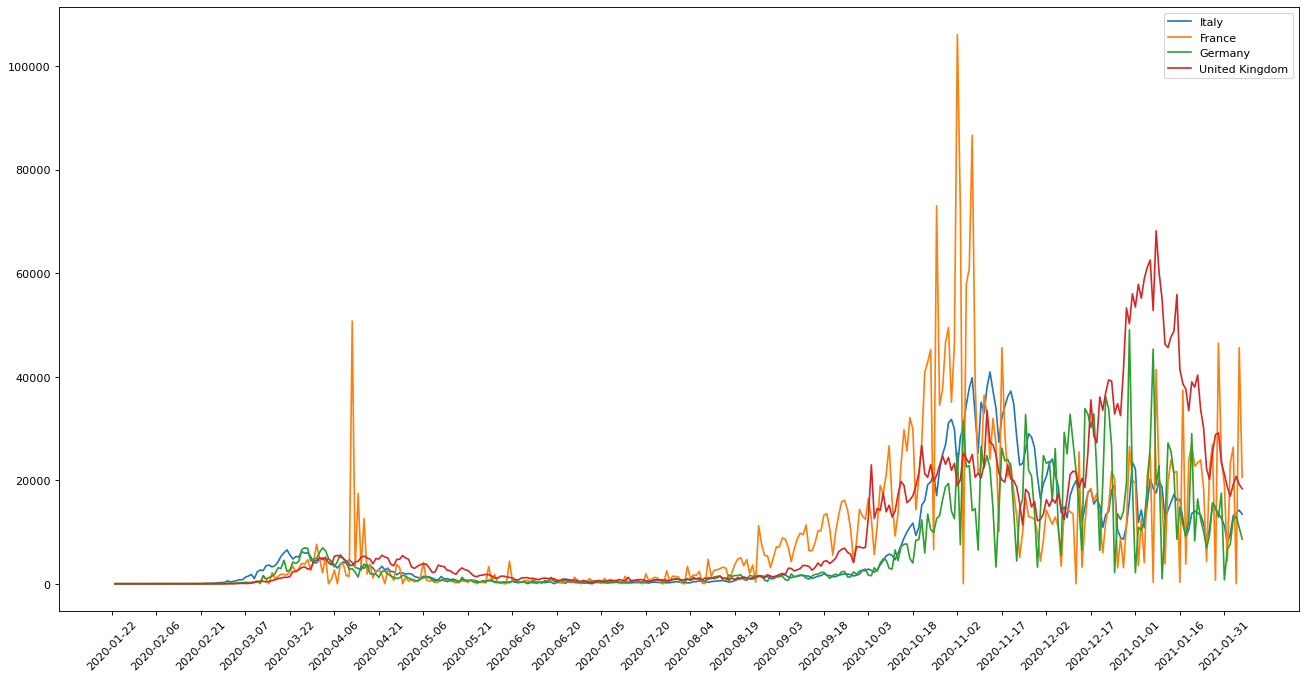

In [56]:
#Plot of 4 countries

countries = ["Italy", "France", "Germany", "United Kingdom"]
colours = ["red", "blue", "orange", "green"]
countries_new_confirmed = []
dates = df_formatted.loc[df_formatted["Country"] == "Italy"]["Date"]

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(np.arange(0, len(dates)+1, 15), rotation=45)

for country in countries:
    plt.plot(dates, df_formatted.loc[df_formatted["Country"] == country]["New Confirmed"], label=country)
    
plt.legend()
plt.show()